In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head(5)

,Date,Hour,CellName,Traffic
0,10/23/2017 0:00,7,Cell_001803,15.13867
1,10/23/2017 0:00,2,Cell_002303,2.05516
2,10/23/2017 0:00,7,Cell_004083,71.55308
3,10/23/2017 0:00,0,Cell_003781,557.98491
4,10/23/2017 0:00,3,Cell_000112,0.98166


In [4]:
df.head(5).to_json('data_before')

In [5]:
df.shape

(497544, 4)

In [6]:
df.isnull().any()

Date        False
Hour        False
CellName    False
Traffic     False
dtype: bool

## Charts of traffic versus cell and traffic versus time of day 

In [7]:
traff_SpecificCell = {}

In [8]:
for cell, traff in zip(df['CellName'], df['Traffic']):
    if cell in traff_SpecificCell:
        traff_SpecificCell[cell] += traff
    else:
        traff_SpecificCell[cell] = traff

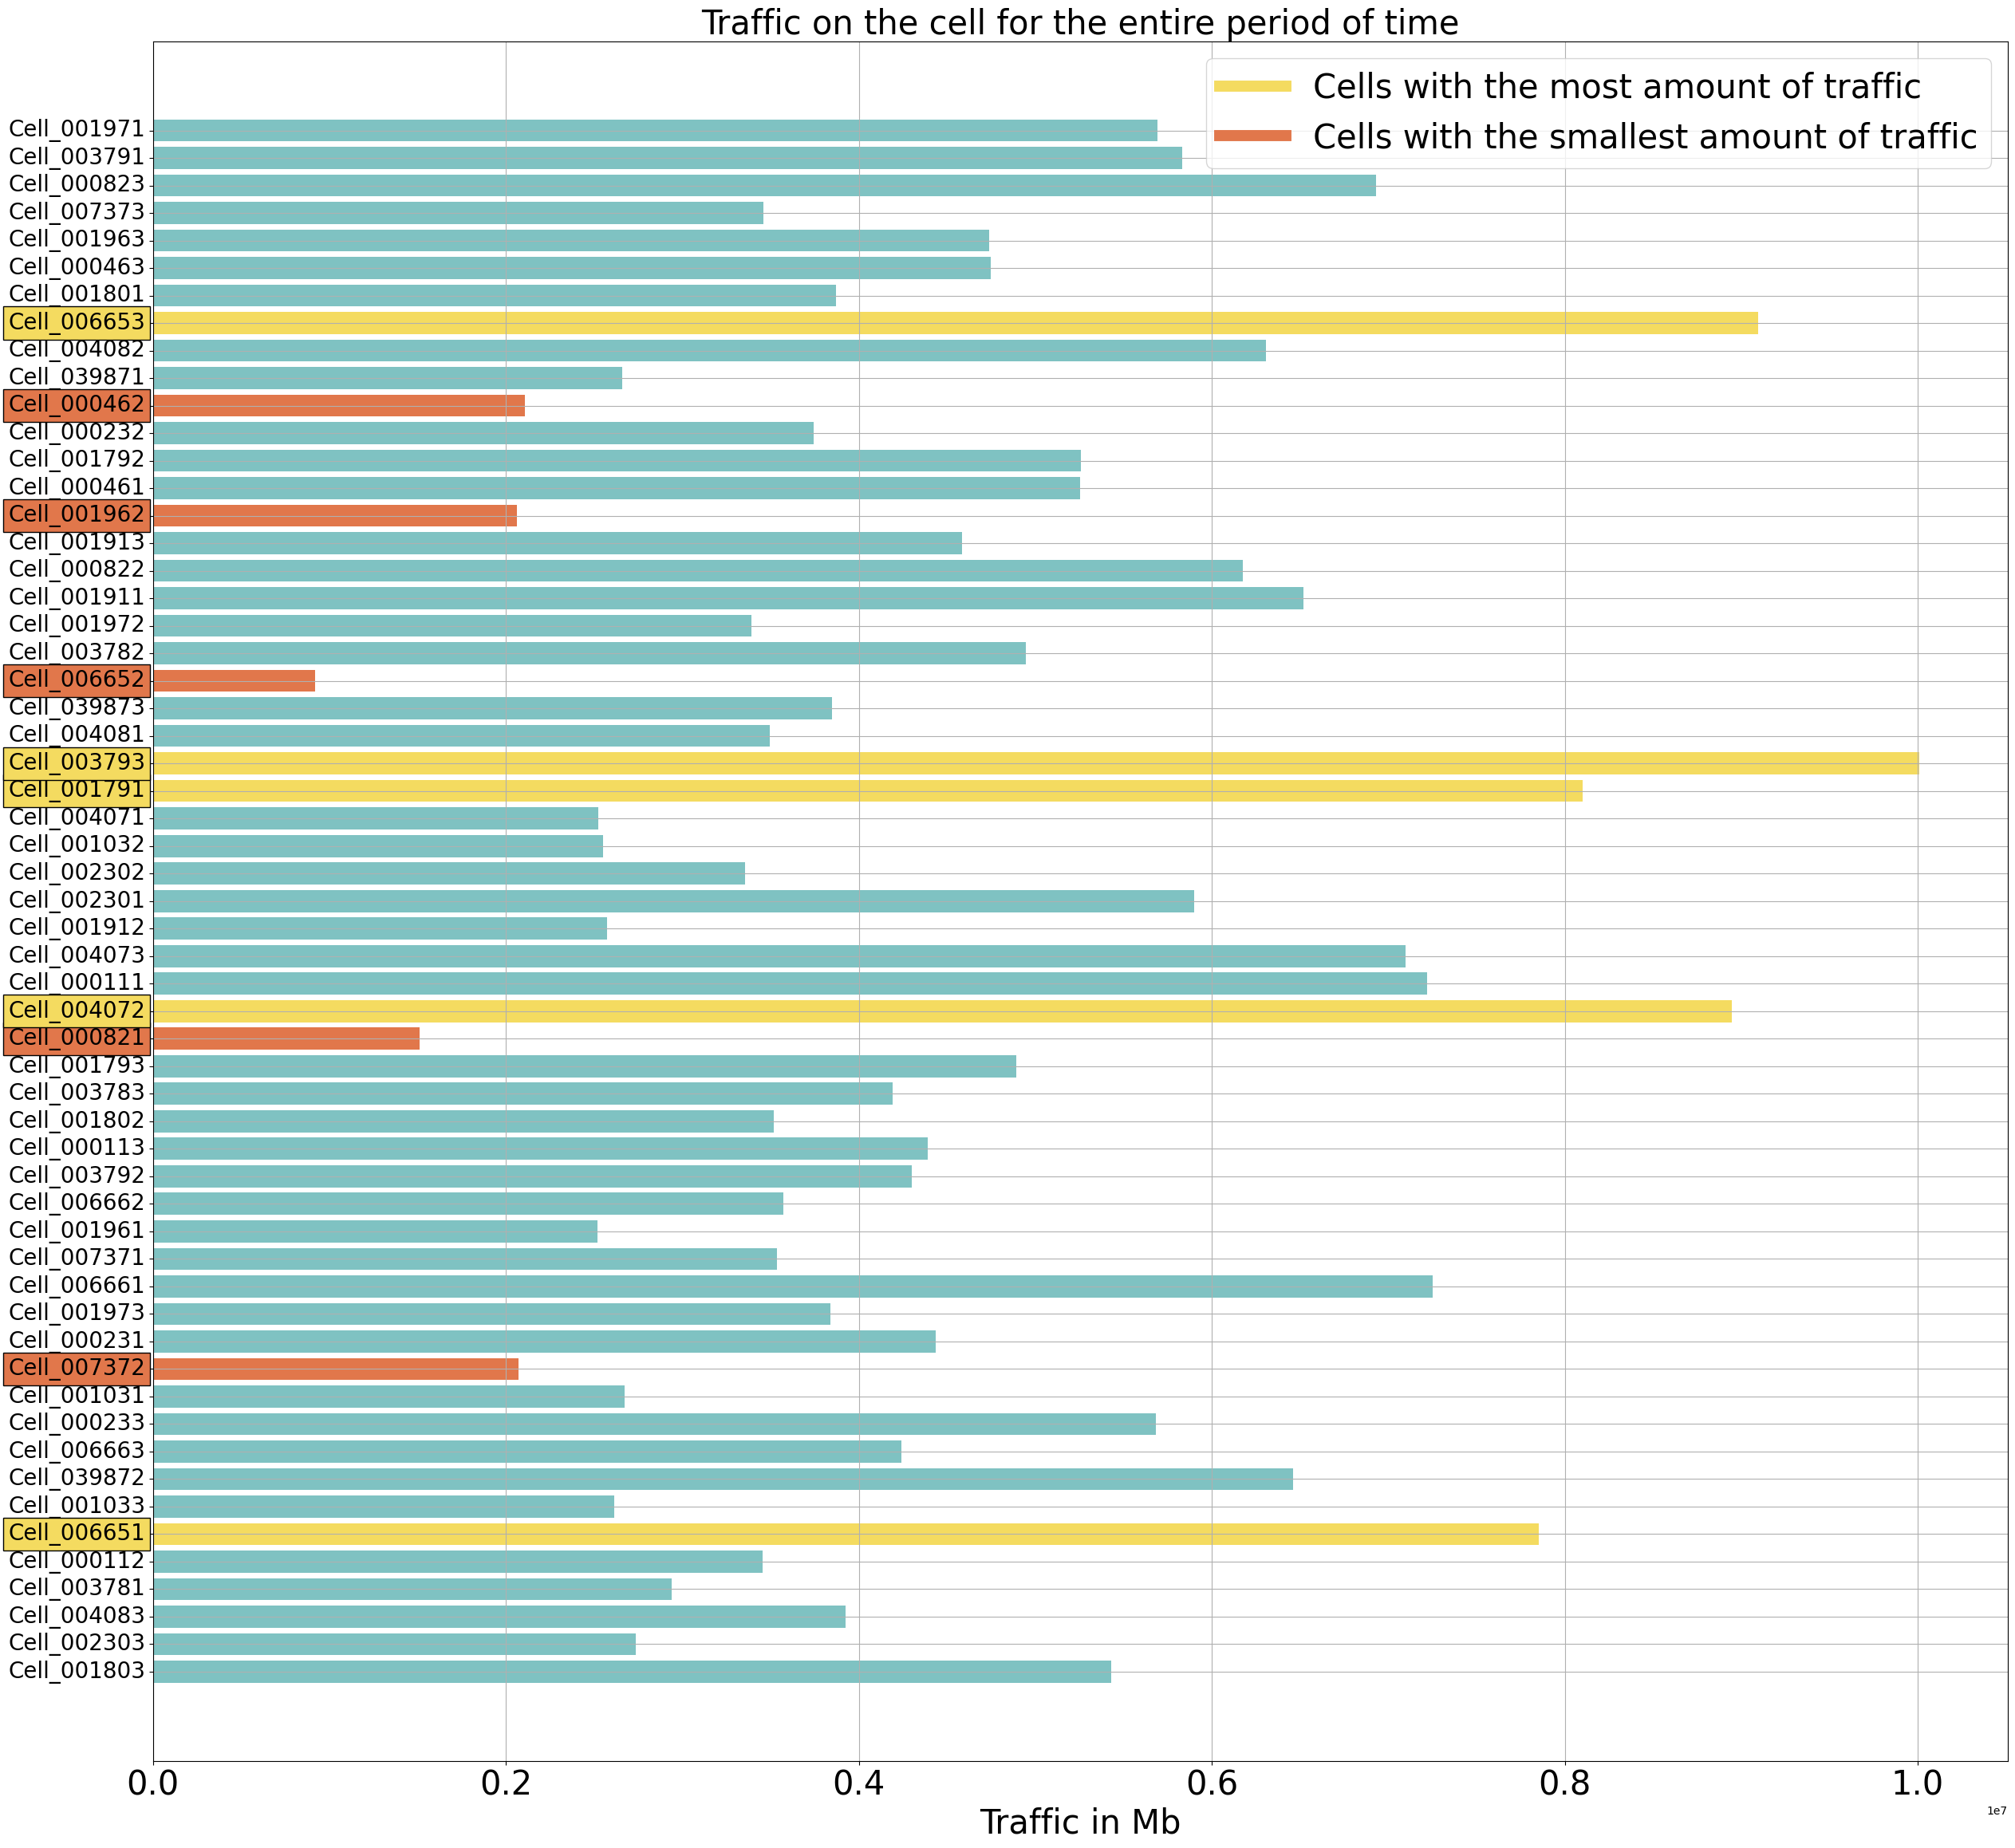

In [9]:
specCell = []
specTraff = []

for cell in traff_SpecificCell:
    specCell.append(cell)
    specTraff.append(traff_SpecificCell[cell])
    
min_traffic, max_traffic = min(specTraff), max(specTraff)  

position = np.arange(len(specCell))

fig, ax = plt.subplots()

barh = ax.barh(position, specTraff, color = '#7FC2C2')
ax.set_yticks(position)
ax.grid()
labels = ax.set_yticklabels(specCell, fontsize = 18, color = 'black', verticalalignment = 'center')

ten_percent = int(len(specCell) * 0.1)
small_traffic, big_traffic = [], []
sort_traff = sorted(specTraff)
sort_traff = [sort_traff[ten_percent], sort_traff[-ten_percent]]
for i in range(len(specTraff)):
    if specTraff[i] < sort_traff[0]:
        small_traffic.append(i)
    elif specTraff[i] >= sort_traff[1]:
        big_traffic.append(i)

for elemS, elemB in zip(small_traffic, big_traffic):
    labels[elemS].set_bbox({'facecolor':'#E1774B'})
    barh[elemS].set_facecolor('#E1774B') 
    labels[elemB].set_bbox({'facecolor':'#F4DB60'})
    barh[elemB].set_facecolor('#F4DB60') 
    
fig.set_figwidth(30)
fig.set_figheight(28)
plt.title('Traffic on the cell for the entire period of time',  fontsize=30)
plt.xlabel("Traffic in Mb", fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 20)
handle1 = mpl.lines.Line2D([], [], c='#F4DB60', linewidth = 10)
handle2 = mpl.lines.Line2D([], [], c='#E1774B', linewidth = 10)
plt.legend(handles=[handle1, handle2], labels=['Cells with the most amount of traffic', 'Cells with the smallest amount of traffic'], prop={'size': 30})
plt.show()
fig.savefig('Traffic on the cells.svg')
fig.savefig('Traffic on the cells.png')

In [10]:
lowest_traff_SpecificTime = {}
highest_traff_SpecificTime = {}
mean_traff_SpecififcTime = {}
lowest_cell = ('Cell_007372', 'Cell_000821', 'Cell_006652', 'Cell_001962', 'Cell_000462')
highest_cell = ('Cell_006651', 'Cell_004072', 'Cell_001791', 'Cell_003793', 'Cell_006653')

In [11]:
for cell, time, traff in zip(df['CellName'], df['Hour'], df['Traffic']):
    if (time in lowest_traff_SpecificTime) and (cell in lowest_cell):
        lowest_traff_SpecificTime[time] += traff
    elif (time not in lowest_traff_SpecificTime) and (cell in lowest_cell):
        lowest_traff_SpecificTime[time] = traff
    if (time in highest_traff_SpecificTime) and (cell in highest_cell):
        highest_traff_SpecificTime[time] += traff
    elif (time not in highest_traff_SpecificTime) and (cell in highest_cell):
        highest_traff_SpecificTime[time] = traff
    if (time in mean_traff_SpecififcTime) and (cell not in highest_cell) and (cell not in lowest_cell):
        mean_traff_SpecififcTime[time] += traff
    elif (time not in mean_traff_SpecififcTime) and (cell not in highest_cell) and (cell not in lowest_cell):
        mean_traff_SpecififcTime[time] = traff

In [12]:
low_traff = np.array([])
high_traff = np.array([])
mean_traff = np.array([])
for i in range(24):
    low_traff = np.append(low_traff, [lowest_traff_SpecificTime.get(i)])
    high_traff = np.append(high_traff, [highest_traff_SpecificTime.get(i)])
    mean_traff = np.append(mean_traff, [mean_traff_SpecififcTime.get(i)])

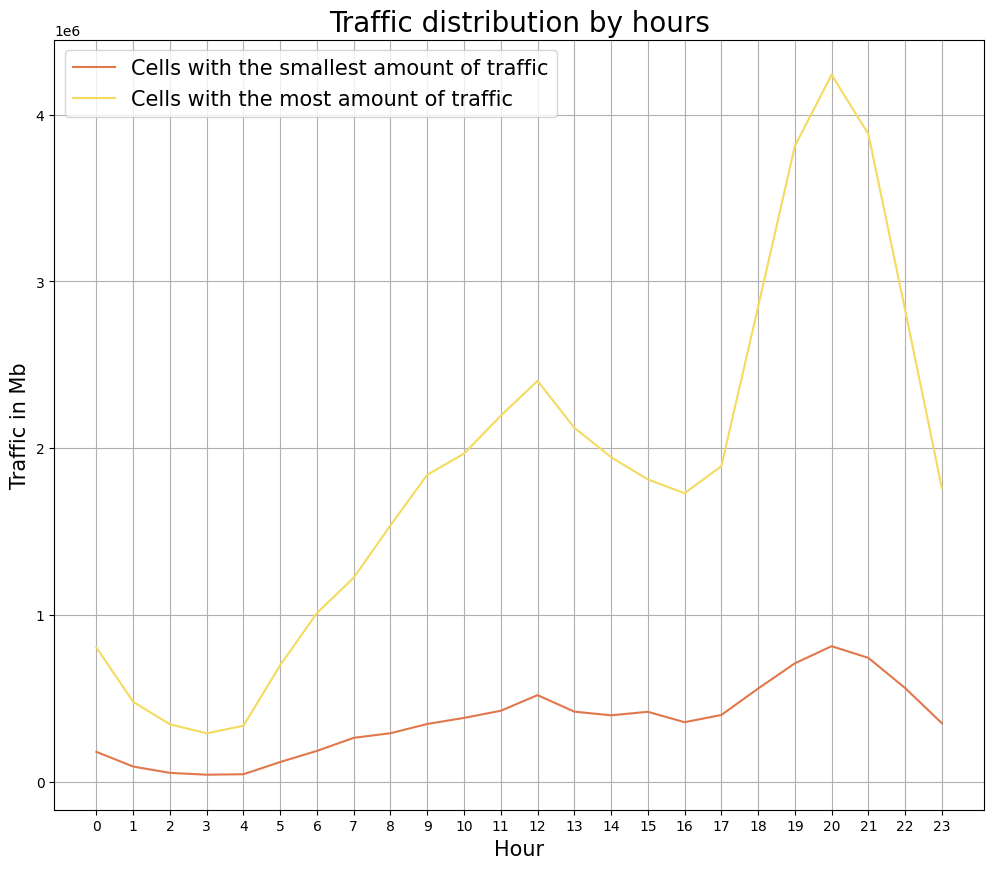

In [13]:
fig, ax = plt.subplots()

ax.plot(range(24), low_traff, c = '#E1774B', label = 'Cells with the smallest amount of traffic')
ax.plot(range(24), high_traff, c = '#F4DB60', label = 'Cells with the most amount of traffic')
ax.grid()
ax.legend(fontsize = 15)

fig.set_figwidth(12)
fig.set_figheight(10)

plt.title('Traffic distribution by hours', fontsize=20)
plt.xlabel('Hour', fontsize = 15)
plt.ylabel('Traffic in Mb', fontsize=15)
plt.xticks(np.arange(0, 24, 1), fontsize = 10)
fig.savefig('Traffic distribution by hours.svg')
fig.savefig('Traffic distribution by hours.png')

## Data Preprocessing

In [14]:
df['Month'] = df.Date.str[:df.Date.str.find('/')[0]]
df['Day'] = df.Date.str[df.Date.str.find('/')[0]+1:df.Date.str.rfind('/')[0]]
df['Year'] = df.Date.str[df.Date.str.rfind('/')[0]+1:df.Date.str.rfind('/')[0]+5]

In [15]:
df.head(5)

,Date,Hour,CellName,Traffic,Month,Day,Year
0,10/23/2017 0:00,7,Cell_001803,15.13867,10,23,2017
1,10/23/2017 0:00,2,Cell_002303,2.05516,10,23,2017
2,10/23/2017 0:00,7,Cell_004083,71.55308,10,23,2017
3,10/23/2017 0:00,0,Cell_003781,557.98491,10,23,2017
4,10/23/2017 0:00,3,Cell_000112,0.98166,10,23,2017


In [16]:
df.Year.unique()

array(['2017', '017 ', '18 0', '018 ', '2018'], dtype=object)

In [17]:
df.Year.replace('017 ', '2017', inplace=True)
df.Year.replace('18 0', '2018', inplace=True)
df.Year.replace('018 ', '2018', inplace=True)

In [18]:
df.Year.unique()

array(['2017', '2018'], dtype=object)

In [19]:
df.Year.replace('2017', 2017, inplace=True)
df.Year.replace('2018', 2018, inplace=True)

In [20]:
df.Year.unique()

array([2017, 2018], dtype=int64)

In [21]:
df.Month.unique()

array(['10', '11', '12', '1/', '2/', '3/', '4/', '5/', '6/', '7/', '8/',
       '9/'], dtype=object)

In [22]:
df.Date[df.Month == '1/'].unique()

array(['1/1/2018 0:00', '1/2/2018 0:00', '1/3/2018 0:00', '1/4/2018 0:00',
       '1/5/2018 0:00', '1/6/2018 0:00', '1/7/2018 0:00', '1/8/2018 0:00',
       '1/9/2018 0:00', '1/10/2018 0:00', '1/11/2018 0:00',
       '1/12/2018 0:00', '1/13/2018 0:00', '1/14/2018 0:00',
       '1/15/2018 0:00', '1/16/2018 0:00', '1/17/2018 0:00',
       '1/18/2018 0:00', '1/19/2018 0:00', '1/20/2018 0:00',
       '1/21/2018 0:00', '1/22/2018 0:00', '1/23/2018 0:00',
       '1/24/2018 0:00', '1/25/2018 0:00', '1/26/2018 0:00',
       '1/27/2018 0:00', '1/28/2018 0:00', '1/29/2018 0:00',
       '1/30/2018 0:00', '1/31/2018 0:00'], dtype=object)

In [23]:
for i in range(1, 10):
    df.Month.replace(str(i)+'/', str(i), inplace=True)

In [24]:
df.Month.unique()

array(['10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [25]:
for i in range(1, 13):
    df.Month.replace(str(i), i, inplace=True)

In [26]:
df.Month.unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [27]:
df.Day.unique()

array(['23', '24', '25', '26', '27', '28', '29', '30', '31', '1/', '2/',
       '3/', '4/', '5/', '6/', '7/', '8/', '9/', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '/2', '0/'],
      dtype=object)

In [28]:
for i in range(1, 10):
    df.Day[df.Date.str[2:5] == '/' + str(i) + '/'] = df.Date.str[3]
    df.Day[df.Day == str(i) + '/'] = df.Date.str[2:4]

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18704\3150595642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Day[df.Date.str[2:5] == '/' + str(i) + '/'] = df.Date.str[3]
C:\Users\KIIT\AppData\Local\Temp\ipykernel_18704\3150595642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Day[df.Day == str(i) + '/'] = df.Date.str[2:4]


In [29]:
df.Day.unique()

array(['23', '24', '25', '26', '27', '28', '29', '30', '31', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '/2', '0/'],
      dtype=object)

In [30]:
print(df.Date[df.Day=='/2'].unique())
print(df.Date[df.Day=='0/'].unique())

['1/1/2018 0:00' '1/2/2018 0:00' '1/3/2018 0:00' '1/4/2018 0:00'
 '1/5/2018 0:00' '1/6/2018 0:00' '1/7/2018 0:00' '1/8/2018 0:00'
 '1/9/2018 0:00' '2/1/2018 0:00' '2/2/2018 0:00' '2/3/2018 0:00'
 '2/4/2018 0:00' '2/5/2018 0:00' '2/6/2018 0:00' '2/7/2018 0:00'
 '2/8/2018 0:00' '2/9/2018 0:00' '3/1/2018 0:00' '3/2/2018 0:00'
 '3/3/2018 0:00' '3/4/2018 0:00' '3/5/2018 0:00' '3/6/2018 0:00'
 '3/7/2018 0:00' '3/8/2018 0:00' '3/9/2018 0:00' '4/1/2018 0:00'
 '4/2/2018 0:00' '4/3/2018 0:00' '4/4/2018 0:00' '4/5/2018 0:00'
 '4/6/2018 0:00' '4/7/2018 0:00' '4/8/2018 0:00' '4/9/2018 0:00'
 '5/1/2018 0:00' '5/2/2018 0:00' '5/3/2018 0:00' '5/4/2018 0:00'
 '5/5/2018 0:00' '5/6/2018 0:00' '5/7/2018 0:00' '5/8/2018 0:00'
 '5/9/2018 0:00' '6/1/2018 0:00' '6/2/2018 0:00' '6/3/2018 0:00'
 '6/4/2018 0:00' '6/5/2018 0:00' '6/6/2018 0:00' '6/7/2018 0:00'
 '6/8/2018 0:00' '6/9/2018 0:00' '7/1/2018 0:00' '7/2/2018 0:00'
 '7/3/2018 0:00' '7/4/2018 0:00' '7/5/2018 0:00' '7/6/2018 0:00'
 '7/7/2018 0:00' '7/8/201

In [31]:
df.Day[df.Day == '/2'] = df.Date.str[2]

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18704\1560708507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Day[df.Day == '/2'] = df.Date.str[2]


In [32]:
df.Day[df.Day == '0/'] = df.Date.str[2:4]

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18704\3010124070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Day[df.Day == '0/'] = df.Date.str[2:4]


In [33]:
df.Day.unique()

array(['23', '24', '25', '26', '27', '28', '29', '30', '31', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22'], dtype=object)

In [34]:
for i in range(32):
    df.Day.replace(str(i), i, inplace=True)

In [35]:
df.Day.unique()

array([23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
      dtype=int64)

In [36]:
df.drop(columns=['Date'], inplace=True)

In [37]:
df.head(5)

,Hour,CellName,Traffic,Month,Day,Year
0,7,Cell_001803,15.13867,10,23,2017
1,2,Cell_002303,2.05516,10,23,2017
2,7,Cell_004083,71.55308,10,23,2017
3,0,Cell_003781,557.98491,10,23,2017
4,3,Cell_000112,0.98166,10,23,2017


## Correlation

In [38]:
Traffic_2017 = df.Traffic[df.Year == 2017].sum()
Traffic_2018 = df.Traffic[df.Year == 2018].sum()

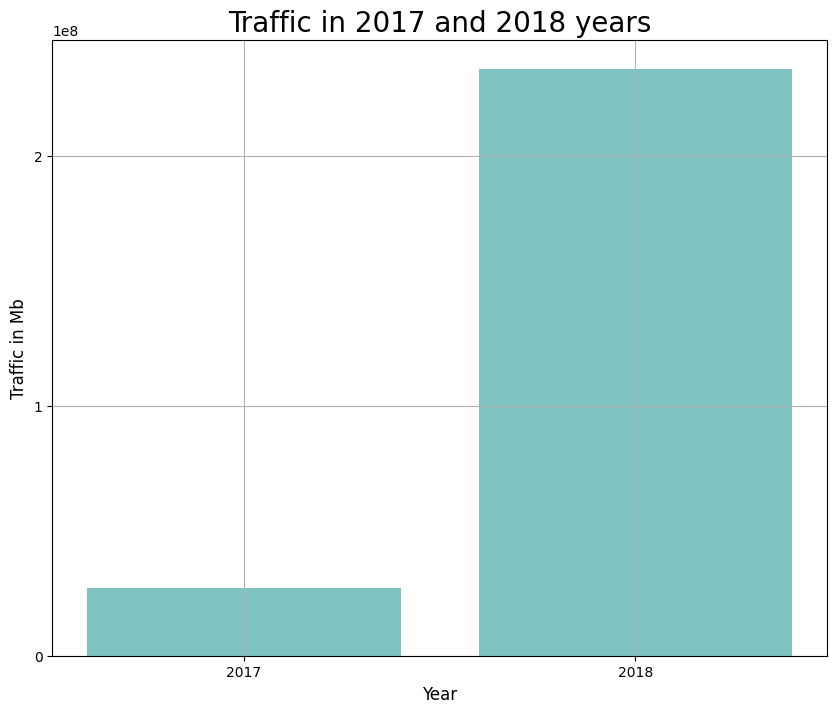

In [39]:
fig, ax = plt.subplots()
ax.bar(2017, Traffic_2017, color= '#7FC2C2')
ax.bar(2018, Traffic_2018, color= '#7FC2C2')
ax.grid()

fig.set_figwidth(10)
fig.set_figheight(8)
plt.title('Traffic in 2017 and 2018 years', fontsize=20)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Traffic in Mb', fontsize=12)
plt.xticks(np.arange(2017, 2019, 1), fontsize = 10)
plt.yticks(np.arange(0, 2.1e8, 1e8), fontsize = 10)
plt.show()
fig.savefig('Traffic in 2017 and 2018 years.svg')
fig.savefig('Traffic in 2017 and 2018 years.png')

In [40]:
Traffic_2018part1 = df.Traffic[(df.Year == 2017) | ((df.Year == 2018) 
                                                                     & (df.Month < 5))].sum()
Traffic_2018part2 = df.Traffic[(df.Year == 2018) & (df.Month >= 5)].sum()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18704\502962071.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10.2017-04.2018', '05.2018-10.2018'], fontsize = 13)


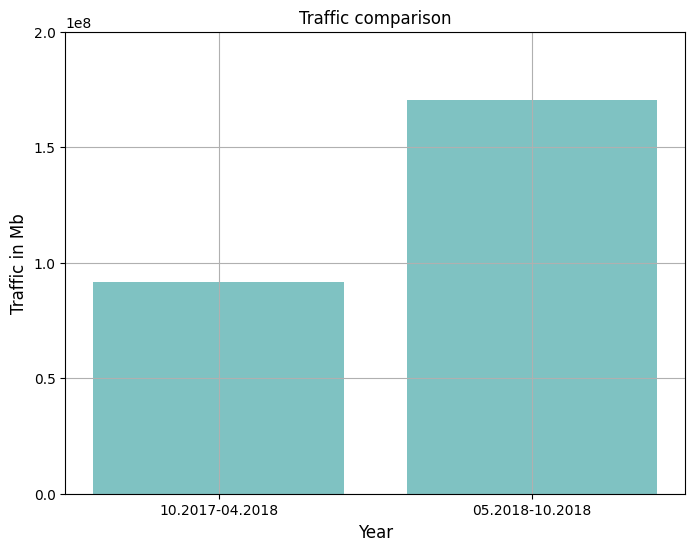

In [41]:
fig, ax = plt.subplots()
ax.bar(np.arange(2),[Traffic_2018part1, Traffic_2018part2], color= '#7FC2C2')
ax.grid()
ax.set_xticklabels(['10.2017-04.2018', '05.2018-10.2018'], fontsize = 13)

fig.set_figwidth(8)
fig.set_figheight(6)
plt.title('Traffic comparison', fontsize=12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Traffic in Mb', fontsize=12)
plt.xticks(np.arange(0, 2, 1), fontsize = 10)
plt.yticks(np.arange(0, 2.1e8, 0.5e8), fontsize = 10)
plt.show()
fig.savefig('Traffic comparison.svg')
fig.savefig('Traffic comparison.png')

In [42]:
TrafficMonth = []
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 
          'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] 

for i in range(1, 13):
    TrafficMonth.append(df.Traffic[df.Month == i].sum())

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18704\3519814258.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, fontsize = 13)


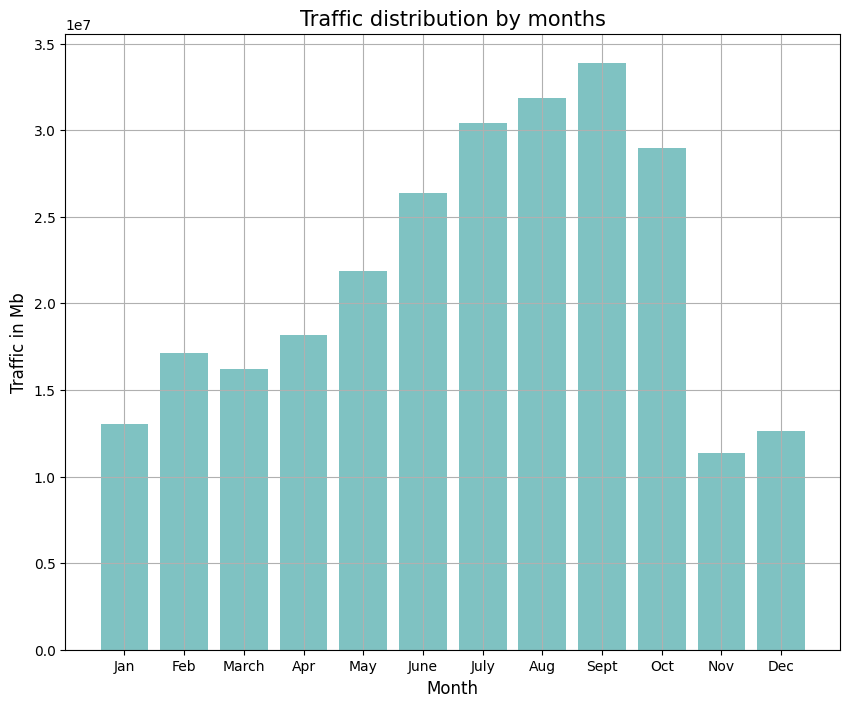

In [43]:
fig, ax = plt.subplots()
ax.bar(np.arange(1, 13), TrafficMonth, color= '#7FC2C2')
ax.grid()
ax.set_xticklabels(months, fontsize = 13)

fig.set_figwidth(10)
fig.set_figheight(8)
plt.title('Traffic distribution by months', fontsize=15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Traffic in Mb', fontsize=12)
plt.xticks(np.arange(1, 13, 1), fontsize = 10)
plt.show()
fig.savefig('Traffic distribution by months.svg')
fig.savefig('Traffic distribution by months.png')

In [44]:
TrafficDay = []

for i in range(1, 32):
    TrafficDay.append(df.Traffic[df.Day == i].sum())

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18704\3830165130.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(1, 32), fontsize = 13)


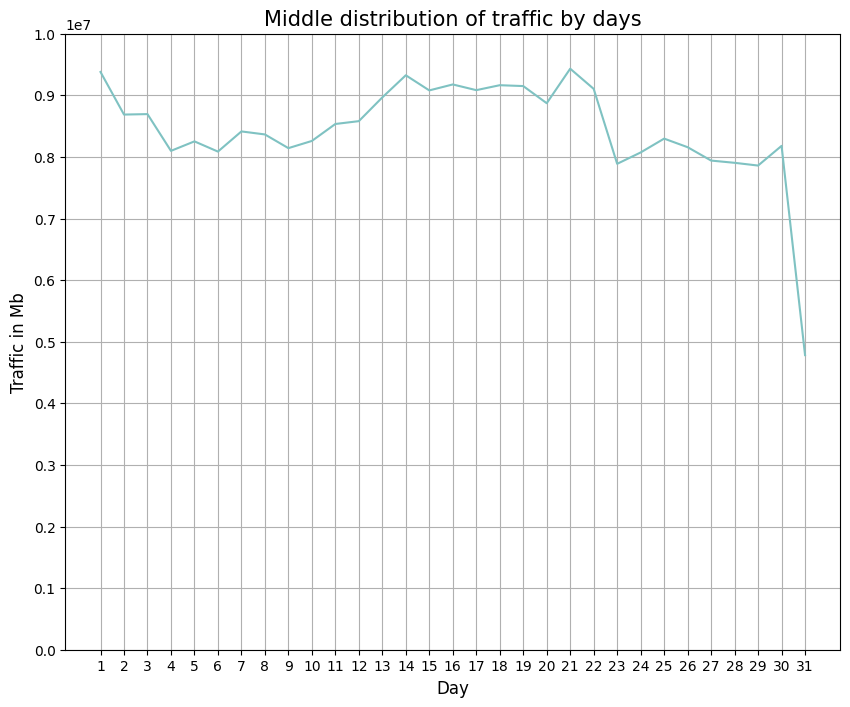

In [45]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 32), TrafficDay, color = '#7FC2C2')
ax.grid()
ax.set_xticklabels(np.arange(1, 32), fontsize = 13)

fig.set_figwidth(10)
fig.set_figheight(8)
plt.title('Middle distribution of traffic by days', fontsize=15)
plt.xlabel('Day', fontsize = 12)
plt.ylabel('Traffic in Mb', fontsize=12)
plt.xticks(np.arange(1, 32, 1), fontsize = 10)
plt.yticks(np.arange(0, 1.1e7, 0.1e7), fontsize = 10)
plt.show()
fig.savefig('Middle distribution of traffic by days.svg')
fig.savefig('Middle distribution of traffic by days.png')

In [46]:
df.head()

,Hour,CellName,Traffic,Month,Day,Year
0,7,Cell_001803,15.13867,10,23,2017
1,2,Cell_002303,2.05516,10,23,2017
2,7,Cell_004083,71.55308,10,23,2017
3,0,Cell_003781,557.98491,10,23,2017
4,3,Cell_000112,0.98166,10,23,2017


## Feature Correlation 

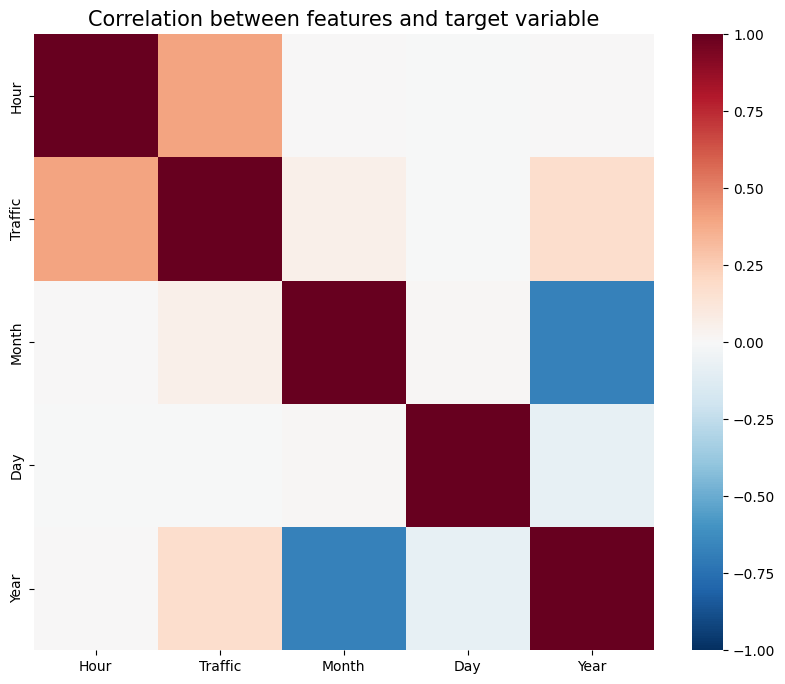

In [47]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
ax = sns.heatmap(df.drop(columns=['CellName']).corr(), 
                 cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0)
plt.title('Correlation between features and target variable', fontsize=15)

fig.savefig('Correlation.svg')
fig.savefig('Correlation.png')

## Target variable distribution 

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18704\1418951134.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


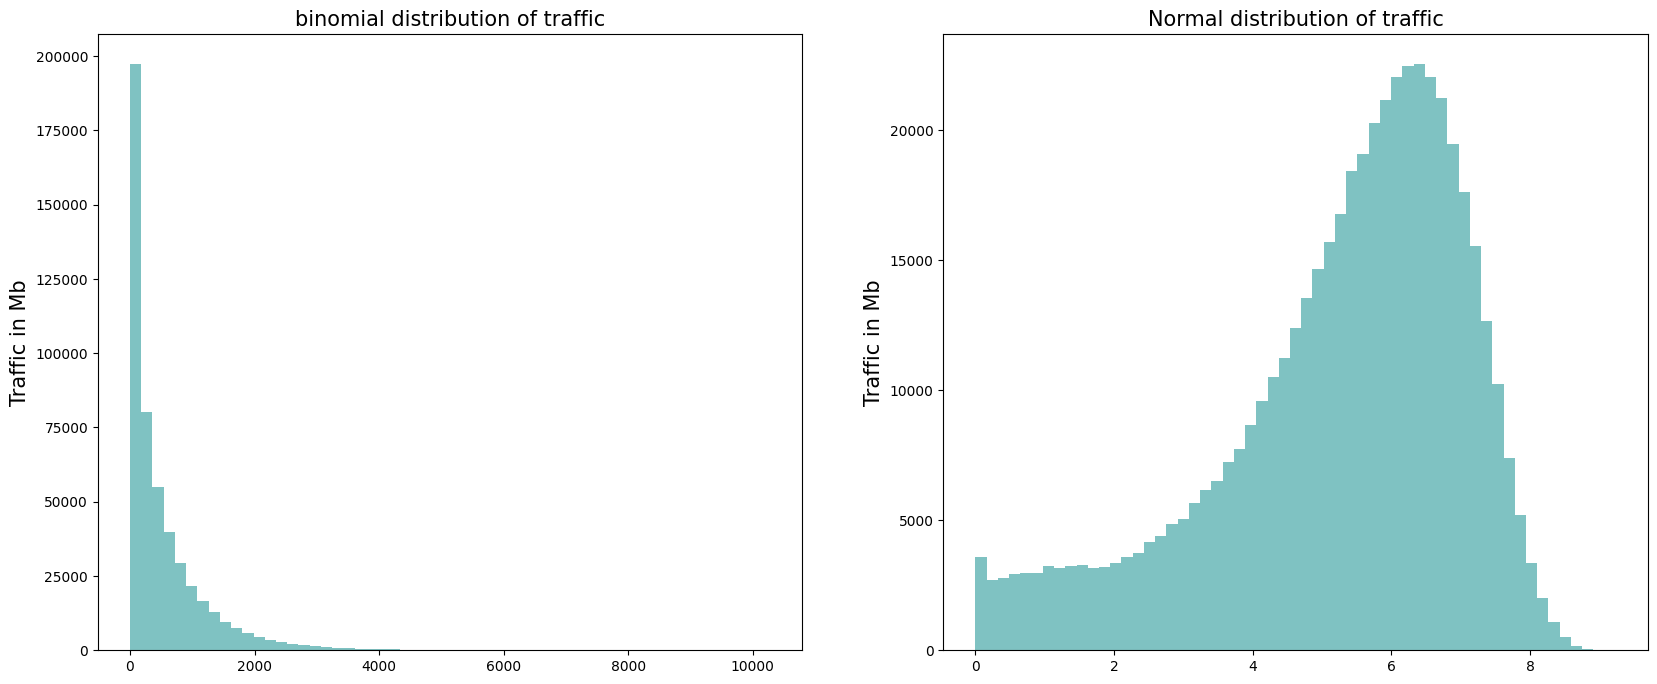

In [48]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.subplot(1, 2, 1)
plt.hist(df.Traffic, bins=57, color = '#7FC2C2')
plt.title('binomial distribution of traffic', fontsize=15)
plt.ylabel('Traffic in Mb', fontsize=15)

plt.subplot(1, 2, 2)
plt.hist(np.log1p(df.Traffic), bins=57, color = '#7FC2C2')
plt.title('Normal distribution of traffic', fontsize=15)
plt.ylabel('Traffic in Mb', fontsize=15)
fig.savefig('Traffic distributions.svg')
fig.savefig('Traffic distributions.png')

In [49]:
df.Month = (df.Month - 1)/11
df.Day = (df.Day - 1)/30
df.Hour = np.sin(df.Hour/24)

In [50]:
target = pd.DataFrame(df.Traffic)
df.drop(columns='Traffic', inplace=True)

In [51]:
df.head(5)

,Hour,CellName,Month,Day,Year
0,0.287549,Cell_001803,0.818182,0.733333,2017
1,0.083237,Cell_002303,0.818182,0.733333,2017
2,0.287549,Cell_004083,0.818182,0.733333,2017
3,0.000000,Cell_003781,0.818182,0.733333,2017
4,0.124675,Cell_000112,0.818182,0.733333,2017


In [52]:
target.head(5)

,Traffic
0,15.13867
1,2.05516
2,71.55308
3,557.98491
4,0.98166


In [53]:
cellsFrameLin = pd.get_dummies(df.CellName, drop_first=True) # data for linear model (delete 1 feture)
cellsFrameTree = pd.get_dummies(df.CellName) # data for nonlinear model
Year = pd.get_dummies(df.Year)
print('Linear Model data shape: ', cellsFrameLin.shape)
print('Nonlinear Model data shape: ', cellsFrameTree.shape)

Linear Model data shape:  (497544, 56)
Nonlinear Model data shape:  (497544, 57)


In [54]:
df.drop(columns=['CellName'], inplace=True)
df.drop(columns=['Year'], inplace=True)

In [55]:
df_lin = df
df_tree = df
target_Lin = np.log1p(target.Traffic)
target_Tree = np.log1p(target.Traffic)

In [56]:
df_lin = df_lin.join(cellsFrameLin)
df_tree = df_tree.join(cellsFrameTree)
df_lin = df_lin.join(Year)
df_tree = df_tree.join(Year)

In [57]:
del cellsFrameLin, cellsFrameTree, Year, df, target

In [58]:
df_lin.head()

,Hour,Month,Day,Cell_000112,Cell_000113,Cell_000231,Cell_000232,Cell_000233,Cell_000461,Cell_000462,...,Cell_006662,Cell_006663,Cell_007371,Cell_007372,Cell_007373,Cell_039871,Cell_039872,Cell_039873,2017,2018
0,0.287549,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.083237,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.287549,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.124675,0.818182,0.733333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
df_tree.head()

,Hour,Month,Day,Cell_000111,Cell_000112,Cell_000113,Cell_000231,Cell_000232,Cell_000233,Cell_000461,...,Cell_006662,Cell_006663,Cell_007371,Cell_007372,Cell_007373,Cell_039871,Cell_039872,Cell_039873,2017,2018
0,0.287549,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.083237,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.287549,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.124675,0.818182,0.733333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
df_tree.head(5).to_json('data_after')

## Nonlinear models - Bagging, Random Forest & Gradient Descent

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_tree, target_Tree, random_state=42)

In [63]:
d = int(df_tree.shape[1]**0.5)

In [64]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
rf_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=300, max_features=d, splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
gb_reg = GradientBoostingRegressor(max_features=d, n_estimators=200, criterion='friedman_mse')

In [66]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [67]:
%%time

bag_reg.fit(X_train, y_train)

Wall time: 17.8 s


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                 max_samples=100, n_estimators=500, n_jobs=-1, random_state=42)

In [68]:
%%time

rf_reg.fit(X_train, y_train)

Wall time: 51.1 s


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=300, max_features=7,
                                                 max_leaf_nodes=16,
                                                 random_state=42,
                                                 splitter='random'),
                 n_estimators=500, n_jobs=-1, random_state=42)

In [69]:
%%time

gb_reg.fit(X_train, y_train)

Wall time: 17.5 s


GradientBoostingRegressor(max_features=7, n_estimators=200)

In [70]:
print('Bagging RMSE: ', mean_squared_error(y_test, bag_reg.predict(X_test))**0.5)
print('Random Forest RMSE: ', mean_squared_error(y_test, rf_reg.predict(X_test))**0.5)
print('Gradient Boosting RMSE: ', mean_squared_error(y_test, gb_reg.predict(X_test))**0.5)

Bagging RMSE:  1.2764122008240653
Random Forest RMSE:  1.4783703704167526
Gradient Boosting RMSE:  1.1479122278014033


In [71]:
print('Bagging Determination: ', r2_score(y_test, bag_reg.predict(X_test)))
print('Random Forest Determination: ', r2_score(y_test, rf_reg.predict(X_test)))
print('Gradient Boosting Determination: ', r2_score(y_test, gb_reg.predict(X_test)))

Bagging Determination:  0.5091493710547914
Random Forest Determination:  0.34153308610494915
Gradient Boosting Determination:  0.6030051962227533


In [72]:
print('Bagging MAE: ', mean_absolute_error(y_test, bag_reg.predict(X_test)))
print('Random Forest MAE: ', mean_absolute_error(y_test, rf_reg.predict(X_test)))
print('Gradient Boosting MAE: ', mean_absolute_error(y_test, gb_reg.predict(X_test)))

Bagging MAE:  0.9778275068331594
Random Forest MAE:  1.159771519679763
Gradient Boosting MAE:  0.8793231808356399


## Linear models - SVM, Linear Regression, Lasso & Ridge Regression

In [73]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(df_lin, target_Lin, random_state=42)

In [74]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(df_tree, target_Tree, random_state=42)

In [75]:
lin = LinearRegression()
svm = LinearSVR(epsilon=0.1, C=1)

In [76]:
X_trainL.columns = X_trainL.columns.astype(str)
X_testL.columns = X_testL.columns.astype(str)

In [77]:
%%time

lin.fit(X_trainL, y_trainL)

Wall time: 1.82 s


LinearRegression()

In [78]:
%%time

svm.fit(X_trainL, y_trainL)

Wall time: 4.08 s


LinearSVR(C=1, epsilon=0.1)

In [79]:
print('SVM RMSE: ', mean_squared_error(y_testL, svm.predict(X_testL))**0.5)
print('LinReg RMSE: ', mean_squared_error(y_testL, lin.predict(X_testL))**0.5)

SVM RMSE:  1.3034140426311545
LinReg RMSE:  1.2919036131448651


In [80]:
print('SVM MAE: ', mean_absolute_error(y_testL, svm.predict(X_testL)))
print('LinReg MAE: ', mean_absolute_error(y_testL, lin.predict(X_testL)))

SVM MAE:  0.9881236019803693
LinReg MAE:  0.99502951756741


In [81]:
print('SVM determination: ', r2_score(y_testL, svm.predict(X_testL)))
print('LinReg determination: ', r2_score(y_testL, lin.predict(X_testL)))

SVM determination: 

 0.4881623256033283
LinReg determination:  0.4971624706386356


In [82]:
lasso = Lasso()
ridge = Ridge()

In [83]:
X_trainT.columns = X_trainT.columns.astype(str)
X_testT.columns = X_testT.columns.astype(str)

In [84]:
lasso.fit(X_trainT, y_trainT)

Lasso()

In [85]:
ridge.fit(X_trainT, y_trainT)

Ridge()

In [86]:
print('Lasso RMSE: ', mean_squared_error(y_testT, lasso.predict(X_testT))**0.5)
print('Ridge RMSE: ', mean_squared_error(y_testT, ridge.predict(X_testT))**0.5)

Lasso RMSE:  1.8218764914907122
Ridge RMSE:  1.2919054585825263


In [87]:
print('Lasso MAE: ', mean_absolute_error(y_testT, lasso.predict(X_testT)))
print('Ridge MAE: ', mean_absolute_error(y_testT, ridge.predict(X_testT)))

Lasso MAE:  1.4372826928219424
Ridge MAE:  0.9950285139295457


In [88]:
print('Lasso determination: ', r2_score(y_testT, lasso.predict(X_testT)))
print('Ridge determination: ', r2_score(y_testT, ridge.predict(X_testT)))

Lasso determination:  -1.2254688078749965e-05
Ridge determination:  0.4971610340671029


In [89]:
param_grid = {
    'fit_intercept':('True', 'False'), 
    'normalize':('True', 'False'),
    'copy_X':('True', 'False')
}

In [121]:
lr = LinearRegression()

In [92]:
lr.fit(X_trainL, y_trainL)

LinearRegression()

In [93]:
print('LinReg RMSE: ', mean_squared_error(y_testL, lr.predict(X_testL))**0.5)
print('LinReg MAE: ', mean_absolute_error(y_testL, lr.predict(X_testL)))
print('LinReg determination: ', r2_score(y_testL, lr.predict(X_testL)))

LinReg RMSE:  1.2919036131448651
LinReg MAE:  0.99502951756741
LinReg determination:  0.4971624706386356


In [94]:
param_grid = {
    'tol':[0.001, 0.01],
    'C':[1.0, 0.1], 
    'epsilon':[0.1, 0.001, 0.2]
}

In [95]:
svm = LinearSVR(loss='epsilon_insensitive')
svm_gs= GridSearchCV(svm, param_grid=param_grid, cv=3, verbose=1).fit(X_trainL, y_trainL)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [96]:
svm_gs.best_params_

{'C': 0.1, 'epsilon': 0.2, 'tol': 0.001}

In [97]:
svm = LinearSVR(C=0.1, epsilon=0.001, tol=0.001)

In [98]:
svm.fit(X_trainL, y_trainL)

LinearSVR(C=0.1, epsilon=0.001, tol=0.001)

In [99]:
print('SVM RMSE: ', mean_squared_error(y_testL, svm.predict(X_testL))**0.5)
print('SVM MAE: ', mean_absolute_error(y_testL, svm.predict(X_testL)))
print('SVM determination: ', r2_score(y_testL, svm.predict(X_testL)))

SVM RMSE:  1.3079873238339483
SVM MAE:  0.9887530084949113
SVM determination:  0.48456426071397385


## Bayes Algorithm

In [100]:
from sklearn.linear_model import BayesianRidge

In [101]:
BayesianRidge = BayesianRidge()

In [102]:
%%time
BayesianRidge.fit(X_trainL, y_trainL)

Wall time: 2.25 s


BayesianRidge()

In [103]:
prediction = BayesianRidge.predict(X_testL)

In [104]:
print('BayesianRidge RMSE: ', mean_squared_error(y_testL, prediction))
print('BayesianRidge MAE: ', mean_absolute_error(y_testL, prediction))
print('BayesianRidge determination: ', r2_score(y_testL, prediction))

BayesianRidge RMSE:  1.6690311055132754
BayesianRidge MAE:  0.9950318281648626
BayesianRidge determination:  0.4971576020289522


## Tweedie Regressor

In [105]:
from sklearn.linear_model import TweedieRegressor

In [106]:
TweedieRegressor = TweedieRegressor(power=1, alpha=0.5)

In [107]:
%%time
TweedieRegressor.fit(X_trainL, y_trainL)

Wall time: 533 ms


TweedieRegressor(alpha=0.5, power=1)

In [108]:
prediction = TweedieRegressor.predict(X_testL)

In [109]:
print('TweedieRegressor RMSE: ', mean_squared_error(y_testL, prediction)**0.5)
print('TweedieRegressor MAE: ', mean_absolute_error(y_testL, prediction))
print('TweedieRegressor determination: ', r2_score(y_testL, prediction))

TweedieRegressor RMSE:  1.559084689954121
TweedieRegressor MAE:  1.2196542253615863
TweedieRegressor determination:  0.26766992176268545


## RANSAC Regressor

In [110]:
from sklearn.linear_model import RANSACRegressor

In [111]:
RANSACRegressor = RANSACRegressor()

In [112]:
%%time
RANSACRegressor.fit(X_trainL, y_trainL)

Wall time: 6.14 s


RANSACRegressor()

In [113]:
prediction = RANSACRegressor.predict(X_testL)

In [114]:
print('RANSACRegressor RMSE: ', mean_squared_error(y_testL, prediction)**0.5)
print('RANSACRegressor MAE: ', mean_absolute_error(y_testL, prediction))
print('RANSACRegressor determination: ', r2_score(y_testL, prediction))

RANSACRegressor RMSE:  1.4939591052576513
RANSACRegressor MAE:  1.1127898846234652
RANSACRegressor determination:  0.327573412104916


## Huber Regressor

In [115]:
from sklearn.linear_model import HuberRegressor

In [117]:
HuberRegressor = HuberRegressor()

In [118]:
%%time
HuberRegressor.fit(X_trainL, y_trainL)

Wall time: 12.7 s


HuberRegressor()

In [120]:
prediction = HuberRegressor.predict(X_testL)

In [119]:
print('HuberRegressor RMSE: ', mean_squared_error(y_testL, prediction))
print('HuberRegressor MAE: ', mean_absolute_error(y_testL, prediction))
print('HuberRegressor determination: ', r2_score(y_testL, prediction))

HuberRegressor RMSE:  2.231913808182242
HuberRegressor MAE:  1.1127898846234652
HuberRegressor determination:  0.327573412104916
